In [ ]:
import torch
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [ ]:
train_data = datasets.MNIST(
    "./Datasets", train=True, download=True, transform=transform
)
test_data = datasets.MNIST(
    "./Datasets", train=True, download=False, transform=transform
)

print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Datasets
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
train_data_loader = DataLoader(train_data, shuffle=True, batch_size=64)
test_data_loader = DataLoader(test_data, batch_size=64)

In [ ]:
data_iter = iter(train_data_loader)
x, y = next(data_iter)

x.shape, y.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

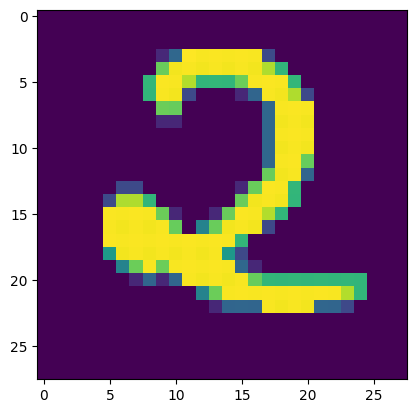

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(x[0].squeeze())

In [ ]:
torch.unique(y)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
class classifer(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = torch.nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self,x:torch.tensor):
        return self.block(x)
    

model = classifer()
criterion = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())

In [ ]:
class classifer(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = torch.nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )

    def forward(self, x: torch.tensor):
        return self.block(x)


model = classifer()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
train_losses, test_losses, accuracies = [], [], []

for epoch in range(10):
    model.train()
    running_loss = 0
    for X, y in train_data_loader:
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    model.eval()
    correct, total = 0, 0
    test_loss = 0
    with torch.no_grad():
        for X_test, y_test in test_data_loader:
            y_pred = model(X_test)
            test_loss += criterion(y_pred, y_test).item()
            preds = torch.argmax(y_pred, dim=1)
            correct += (preds == y_test).sum().item()
            total += y_test.size(0)
    
    acc = correct / total
    train_losses.append(running_loss / len(train_data_loader))
    test_losses.append(test_loss / len(test_data_loader))
    accuracies.append(acc)

    print(f"Epoch [{epoch+1}/10] | Train Loss: {train_losses[-1]:.4f} | Test Acc: {acc:.4f}")

Epoch [1/10] | Train Loss: 0.3756 | Test Acc: 0.9351
Epoch [2/10] | Train Loss: 0.1594 | Test Acc: 0.9622
Epoch [3/10] | Train Loss: 0.1201 | Test Acc: 0.9503
Epoch [4/10] | Train Loss: 0.0976 | Test Acc: 0.9760
Epoch [5/10] | Train Loss: 0.0846 | Test Acc: 0.9762
Epoch [6/10] | Train Loss: 0.0750 | Test Acc: 0.9818
Epoch [7/10] | Train Loss: 0.0652 | Test Acc: 0.9774
Epoch [8/10] | Train Loss: 0.0578 | Test Acc: 0.9858
Epoch [9/10] | Train Loss: 0.0529 | Test Acc: 0.9841
Epoch [10/10] | Train Loss: 0.0484 | Test Acc: 0.9867


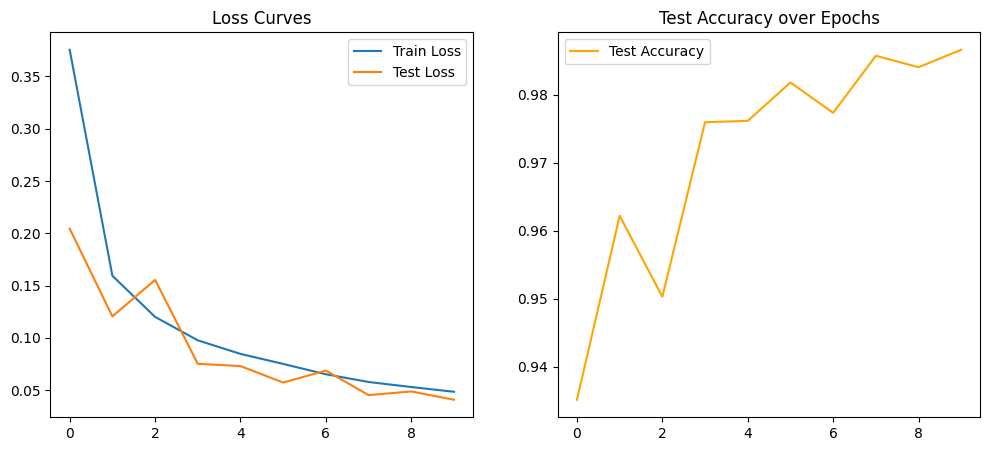

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.title("Loss Curves")

plt.subplot(1, 2, 2)
plt.plot(accuracies, label="Test Accuracy", color="orange")
plt.legend()
plt.title("Test Accuracy over Epochs")
plt.show()

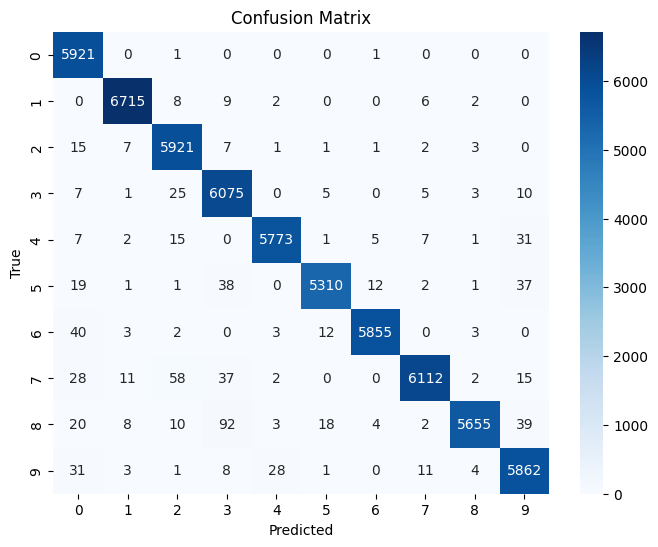

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true, y_pred_all = [], []
model.eval()
with torch.no_grad():
    for X_test, y_test in test_data_loader:
        y_pred = model(X_test)
        preds = torch.argmax(y_pred, dim=1)
        y_true.extend(y_test.numpy())
        y_pred_all.extend(preds.numpy())

cm = confusion_matrix(y_true, y_pred_all)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

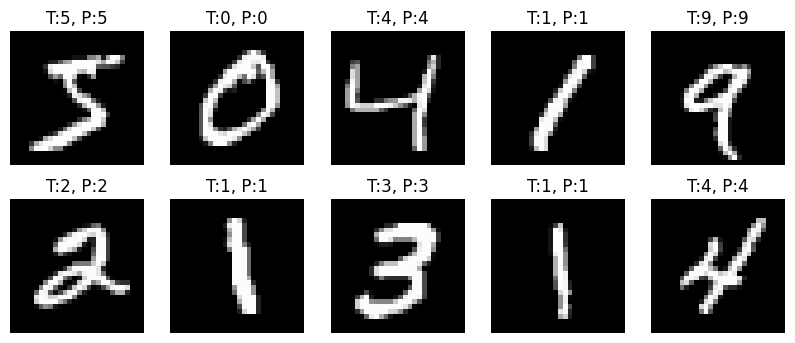

In [ ]:
examples = iter(test_data_loader)
images, labels = next(examples)
with torch.no_grad():
    outputs = model(images)
    preds = torch.argmax(outputs, dim=1)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"T:{labels[i].item()}, P:{preds[i].item()}")
    plt.axis("off")
plt.show()